In [ ]:
import numpy as np
from autotrend import decompose_llt, generate_simple_wave

# Generate a simple sine wave with linear trend
sequence = generate_simple_wave(length=500, frequency=4, add_noise=False)

# Run LLT decomposition with default parameters
result = decompose_llt(seq=sequence)


AutoTrend LLT Decomposition
Sequence length: 500
Configuration: window=5, max_iter=10, threshold=P40

Iteration 1/10
  Focus targets: 495 points
  Focus ranges: [(5, 500)]
  Training window: [0, 5)
  Model: slope=0.0500, intercept=0.0002
  Error stats: mean=0.2525, std=0.1768, P40=0.1764
  Threshold: 0.1764
  Result: 198 accepted (40.0%), 297 remaining (60.0%)
  Total progress: [████████████████░░░░░░░░░░░░░░░░░░░░░░░░] 40.6% (203/500 points)
Iteration 2/10
  Focus targets: 297 points
  Focus ranges: [(28, 103), (153, 227), (278, 352), (403, 477)]
  Training window: [23, 28)
  Model: slope=0.0154, intercept=0.9186
  Error stats: mean=0.2079, std=0.1016, P40=0.1764
  Threshold: 0.1764
  Result: 111 accepted (37.4%), 186 remaining (62.6%)
  Total progress: [█████████████████████████░░░░░░░░░░░░░░░] 62.8% (314/500 points)
Iteration 3/10
  Focus targets: 186 points
  Focus ranges: [(42, 89), (167, 213), (292, 338), (416, 463)]
  Training window: [37, 42)
  Model: slope=-0.0193, intercept=

In [11]:
# Print basic results
print(f"Decomposition completed!")
print(f"  - Number of iterations: {result.get_num_iterations()}")
print(f"  - Number of models: {len(result.models)}")
print(f"  - Trend segments: {len(result.get_trend_segments())}")

# Access decomposition results
print(f"\nTrend Segments:")
for start, end, iteration in result.get_trend_segments():
    print(f"  [{start:4d}, {end:4d}) -> Iteration {iteration}")

# Display model parameters
print(f"\nModel Parameters:")
for i, model in enumerate(result.models, 1):
    slope = model.coef_[0]
    intercept = model.intercept_
    print(f"  Model {i}: slope={slope:.6f}, intercept={intercept:.6f}")

Decomposition completed!
  - Number of iterations: 3
  - Number of models: 3
  - Trend segments: 17

Trend Segments:
  [   0,   28) -> Iteration 1
  [  28,   42) -> Iteration 2
  [  42,   89) -> Iteration 3
  [  89,  103) -> Iteration 2
  [ 103,  153) -> Iteration 1
  [ 153,  167) -> Iteration 2
  [ 167,  213) -> Iteration 3
  [ 213,  227) -> Iteration 2
  [ 227,  278) -> Iteration 1
  [ 278,  292) -> Iteration 2
  [ 292,  338) -> Iteration 3
  [ 338,  352) -> Iteration 2
  [ 352,  403) -> Iteration 1
  [ 403,  416) -> Iteration 2
  [ 416,  463) -> Iteration 3
  [ 463,  477) -> Iteration 2
  [ 477,  500) -> Iteration 1

Model Parameters:
  Model 1: slope=0.050039, intercept=0.000229
  Model 2: slope=0.015421, intercept=0.918577
  Model 3: slope=-0.019283, intercept=0.959803


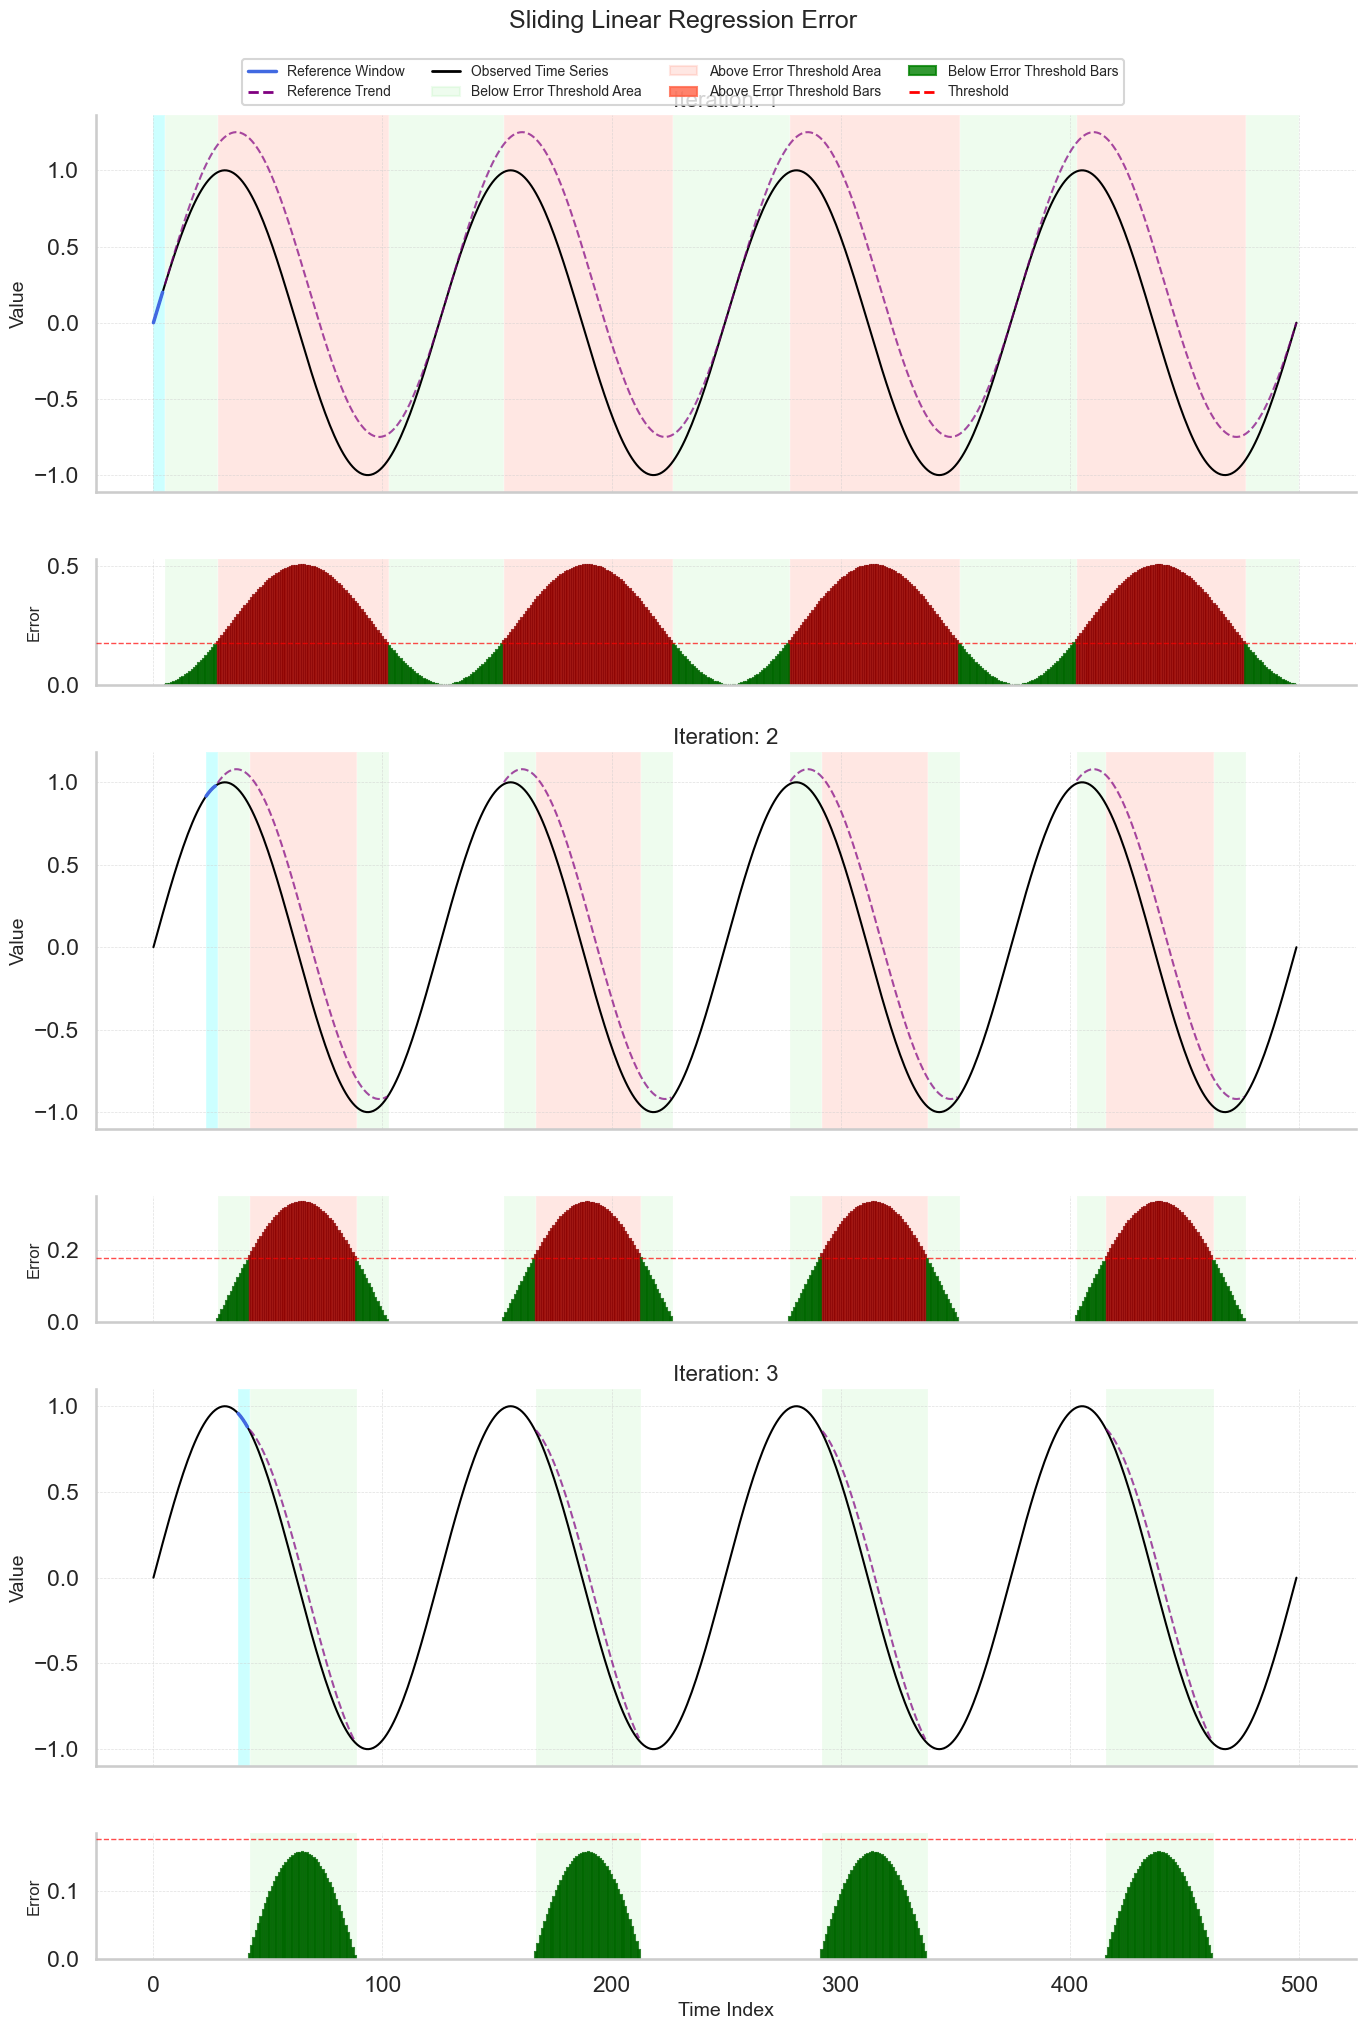

In [13]:
result.plot_error()

yes


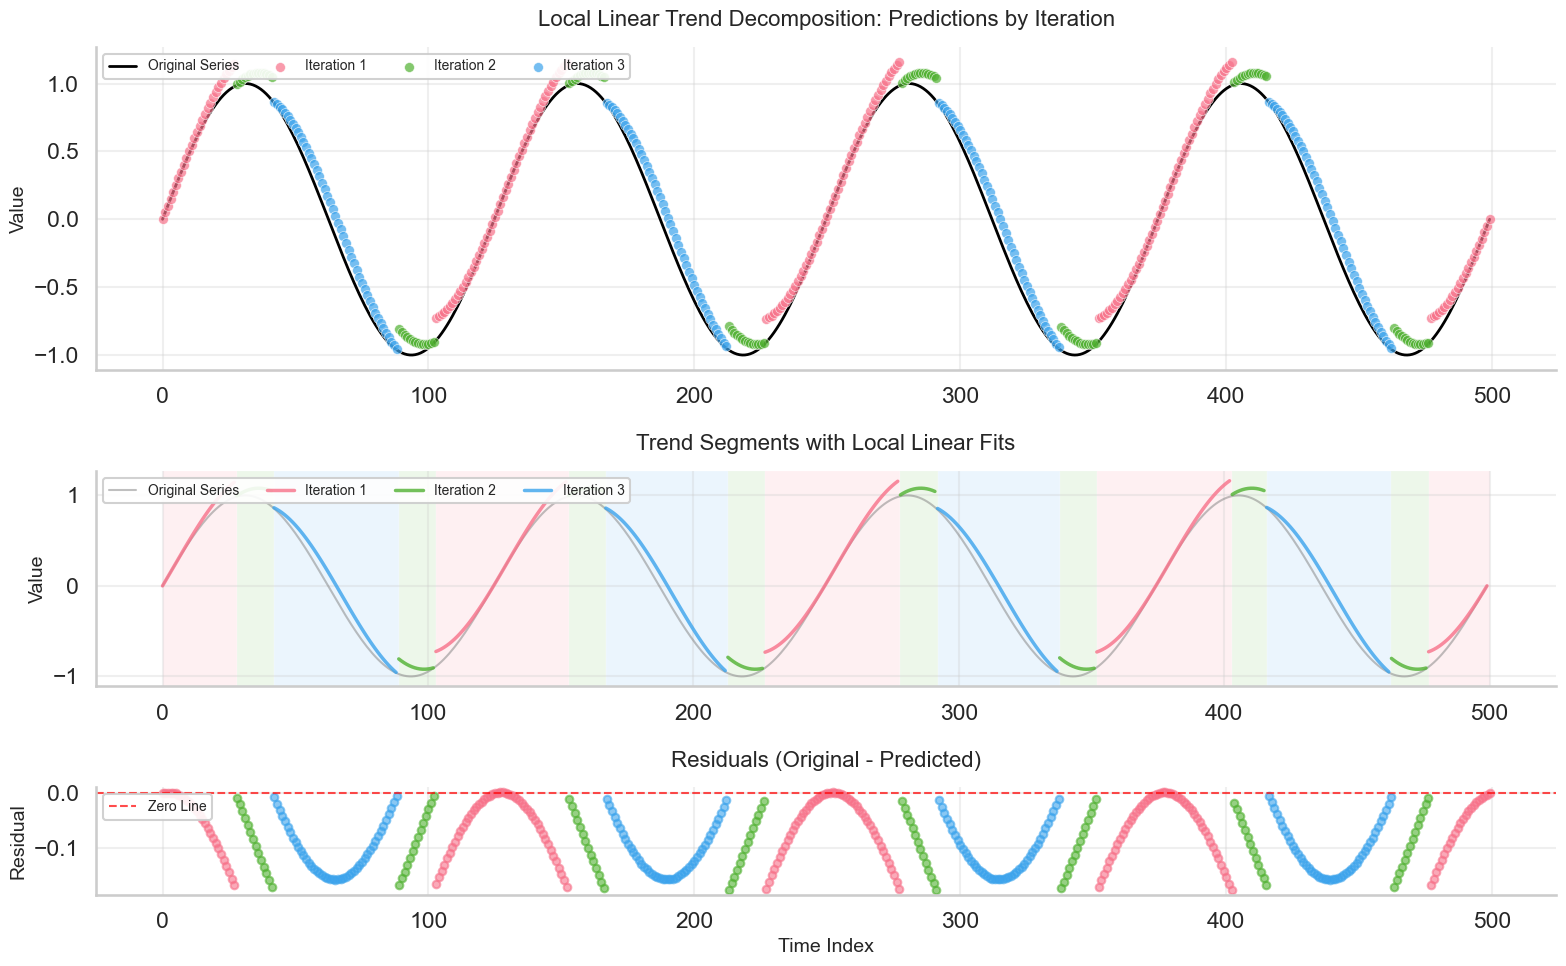

In [14]:
result.plot_full_decomposition()